# Gather

In [85]:
%matplotlib inline
import pandas as pd
import tweepy
import json
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# download image-predictions.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, allow_redirects=True)
open('image-predictions.tsv', 'wb').write(r.content)

335079

In [4]:
img = pd.read_csv('image-predictions.tsv', sep='\t')
img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
with open('tokens.txt') as f:
    lines = f.read().splitlines()
#     print(lines)

consumer_key, consumer_secret, access_token, access_secret = lines

In [41]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

fname = 'tweet_json.txt'
with open(fname, 'w+') as outfile: 
    for tweet_id in df.tweet_id:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            # print(tweet.full_text)
            json.dump(tweet._json, outfile)
            outfile.write("\n")
        except:
            print("Tweet_id ", tweet_id, "not found")


Tweet_id  888202515573088257 not found
Tweet_id  873697596434513921 not found
Tweet_id  872668790621863937 not found
Tweet_id  869988702071779329 not found
Tweet_id  866816280283807744 not found
Tweet_id  861769973181624320 not found
Tweet_id  845459076796616705 not found
Tweet_id  842892208864923648 not found
Tweet_id  837012587749474308 not found
Tweet_id  827228250799742977 not found
Tweet_id  812747805718642688 not found
Tweet_id  802247111496568832 not found
Tweet_id  775096608509886464 not found
Tweet_id  774639387460112384 not found
Tweet_id  774314403806253056 not found
Tweet_id  773985732834758656 not found
Tweet_id  773922284943896577 not found
Tweet_id  773704687002451968 not found
Tweet_id  773670353721753600 not found
Tweet_id  773547596996571136 not found
Tweet_id  773336787167145985 not found
Tweet_id  773308824254029826 not found
Tweet_id  773247561583001600 not found
Tweet_id  773191612633579521 not found
Tweet_id  772877495989305348 not found
Tweet_id  772826264096874

In [6]:
# read json file and convert to dataframe
df2 = pd.read_json('tweet_json.txt',lines=True)
df2 = df2[['id', 'retweet_count','favorite_count']]
df2.head()

,id,retweet_count,favorite_count
0,892420643555336193,8264,37872
1,892177421306343426,6107,32543
2,891815181378084864,4043,24502
3,891689557279858688,8411,41229
4,891327558926688256,9110,39404


In [7]:
len(df2)

774

In [8]:
!wc -l tweet_json.txt

     774 tweet_json.txt


# Assess

In [9]:
df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
800,772615324260794368,NaN,NaN,2016-09-05 02:00:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Gromit. He's pupset bec...,7.652221e+17,4.196984e+09,2016-08-15 16:22:20 +0000,https://twitter.com/dog_rates/status/765222098...,10,10,Gromit,None,None,None,None
1619,684959798585110529,NaN,NaN,2016-01-07 04:48:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's a neat dog. No legs (tragi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684959798...,5,10,Jerry,None,None,None,None
1687,681579835668455424,NaN,NaN,2015-12-28 20:57:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Apollo. He thought you weren't coming ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681579835...,8,10,Apollo,None,None,None,None
549,805207613751304193,NaN,NaN,2016-12-04 00:30:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shooter. He's doing quite the snowy zo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/805207613...,12,10,Shooter,None,None,None,None
504,813051746834595840,NaN,NaN,2016-12-25 16:00:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bauer. He had nothing to do with the c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813051746...,13,10,Bauer,None,None,None,None


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
# missing values
n_missing = df.isnull().sum()
n_missing[n_missing!=0]

in_reply_to_status_id         2278
in_reply_to_user_id           2278
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
dtype: int64

In [12]:
# check duplicates
df.tweet_id.duplicated().sum()

0

In [13]:
df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [14]:
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [15]:
img.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1355,760290219849637889,https://pbs.twimg.com/ext_tw_video_thumb/76028...,1,Old_English_sheepdog,0.302200,True,Lhasa,0.258803,True,briard,0.179200,True
353,672591271085670400,https://pbs.twimg.com/media/CVWGMQMWUAA7aOM.jpg,1,gondola,0.134290,False,lifeboat,0.108356,False,bassinet,0.093679,False
1709,818145370475810820,https://pbs.twimg.com/media/C1qi26rW8AMaj9K.jpg,1,golden_retriever,0.621931,True,Labrador_retriever,0.364997,True,redbone,0.003971,True
153,668655139528511488,https://pbs.twimg.com/media/CUeKTeYW4AEr_lx.jpg,1,beagle,0.319110,True,Italian_greyhound,0.103338,True,basenji,0.091930,True
949,704847917308362754,https://pbs.twimg.com/media/CcgfcANW4AA9hzr.jpg,1,golden_retriever,0.857240,True,Labrador_retriever,0.135460,True,Tibetan_mastiff,0.001903,True


In [16]:
img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
img.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
Cardigan                      19
web_site                      19
beagle                        18
Eskimo_dog                    18
Maltese_dog                   18
teddy                         18
Shetland_sheepdog             18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16
          

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 3 columns):
id                774 non-null int64
retweet_count     774 non-null int64
favorite_count    774 non-null int64
dtypes: int64(3)
memory usage: 18.2 KB


## Quality

**twitter-archive-enhanced.csv table**

- Missing values in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls.
- Presence of retweeted_status_* actually means the tweet is a retweet not the orginal one.
- Several id columns are int64 or float not string.
- timestamp is string not datetime.
- source is in html tag format not the url itself.

**image-predictions.tsv**

- Less rows in image-predictions.tsv than the twitter dataset. Therefore, tweets in twitter-archive-enhanced.csv either have no images or are predicted.
- tweet_id is int not string.
- In p1, p2 and p3 column, upper case and lower case are mixed. Dashes and underscores are mixed too.

**retweet count table**

- Much less tweets compared to the twitter dataset.
- tweet_id is int not string.

## Tidyness

- doggo, floofer, pupper and puppo are just different stages of a dog.
- There are three tables not one table containing all the information.
- Index are not tweet_id.

# Clean

In [19]:
# make a copy for cleaning
dfc = df.copy()

**Define**

Remove retweets

**Code**

In [20]:
dfc = dfc[dfc.retweeted_status_id.isnull()]

**Test**

In [21]:
dfc.retweeted_status_id.isnull().sum()

2175

In [22]:
# remove unnecessary columns
dfc = dfc.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

**Define**

Even though expanded_urls, in_reply_to_status_id and in_reply_to_user_id have missing values, these columns are not useful, so I will drop them too.

**Code**

In [23]:
dfc = dfc.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'expanded_urls'])

**Test**

In [24]:
list(dfc)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

**Define**

Deal with missing values in image_prediction dataset

**Code**

In [25]:
len(dfc)

2175

In [26]:
len(img)

2075

There are 100 missing predictions and we don't have a good way of getting these missing predictions so I'll bear with it.

**Define**

Deal with missing values in retweets_count dataset: many of the tweets haven't been deleted and can't be retrieved by the tweepy API. The course instructor provided a much more complete text file that was retrieved earlier and I saved it as tweet_json_full.txt. I will use this file instead of the file I scraped from the web.

**Code**

In [27]:
df_count = pd.read_json('tweet_json_full.txt',lines=True)
df_count = df_count[['id', 'retweet_count','favorite_count']]
len(df_count)

2354

In [28]:
df_count.rename(columns = {'id':'tweet_id'}, inplace=True)

**Define**

Change datatype of tweet_id from int to string

**Code**

In [29]:
dfc.tweet_id = dfc.tweet_id.astype(str)

In [30]:
img.tweet_id = img.tweet_id.astype(str)

In [31]:
df_count.tweet_id = df_count.tweet_id.astype(str)

**Test**

In [32]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(2), object(9)
memory usage: 203.9+ KB


In [33]:
img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [34]:
df_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


**Define**

Set index as tweet_id

**Code**

In [35]:
dfc.set_index('tweet_id', inplace=True)

In [36]:
img.set_index('tweet_id', inplace=True)

In [37]:
df_count.set_index('tweet_id', inplace=True)

**Test**

In [38]:
dfc.index

Index(['892420643555336193', '892177421306343426', '891815181378084864',
       '891689557279858688', '891327558926688256', '891087950875897856',
       '890971913173991426', '890729181411237888', '890609185150312448',
       '890240255349198849',
       ...
       '666058600524156928', '666057090499244032', '666055525042405380',
       '666051853826850816', '666050758794694657', '666049248165822465',
       '666044226329800704', '666033412701032449', '666029285002620928',
       '666020888022790149'],
      dtype='object', name='tweet_id', length=2175)

In [39]:
img.index

Index(['666020888022790149', '666029285002620928', '666033412701032449',
       '666044226329800704', '666049248165822465', '666050758794694657',
       '666051853826850816', '666055525042405380', '666057090499244032',
       '666058600524156928',
       ...
       '890240255349198849', '890609185150312448', '890729181411237888',
       '890971913173991426', '891087950875897856', '891327558926688256',
       '891689557279858688', '891815181378084864', '892177421306343426',
       '892420643555336193'],
      dtype='object', name='tweet_id', length=2075)

In [40]:
df_count.index

Index(['892420643555336193', '892177421306343426', '891815181378084864',
       '891689557279858688', '891327558926688256', '891087950875897856',
       '890971913173991426', '890729181411237888', '890609185150312448',
       '890240255349198849',
       ...
       '666058600524156928', '666057090499244032', '666055525042405380',
       '666051853826850816', '666050758794694657', '666049248165822465',
       '666044226329800704', '666033412701032449', '666029285002620928',
       '666020888022790149'],
      dtype='object', name='tweet_id', length=2354)

**Define**

Fix timestamp datatype error

**Code**

In [41]:
dfc.timestamp = pd.to_datetime(dfc.timestamp)

**Test**

In [42]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 892420643555336193 to 666020888022790149
Data columns (total 10 columns):
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 186.9+ KB


**Define**

Remove decorators in 'source' column

**Code**

In [43]:
dfc.source.sample(5)

tweet_id
728653952833728512    <a href="http://twitter.com/download/iphone" r...
682032003584274432    <a href="http://twitter.com/download/iphone" r...
701570477911896070    <a href="http://twitter.com/download/iphone" r...
707741517457260545    <a href="http://twitter.com/download/iphone" r...
788150585577050112    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

This column is not useful, so I will drop it directly.

In [44]:
dfc.drop(columns=['source'], inplace=True)

**Test**

In [45]:
list(dfc)

['timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

**Define**

Make values p1, p2, p3 in image prediction dataset consistent by converting them to all lower case and converting dash to underscore

**Code**



In [46]:
# creat a function for clean dog breeds

def clean(s):
    return s.replace('-','_').lower()

In [47]:
img.p1 = img.p1.apply(clean)

In [48]:
img.p2 = img.p2.apply(clean)

In [49]:
img.p3 = img.p3.apply(clean)

**Test**

In [50]:
img.sample(5)

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
683098815881154561,https://pbs.twimg.com/media/CXrawAhWkAAWSxC.jpg,1,golden_retriever,0.889848,True,kuvasz,0.053008,True,labrador_retriever,0.037881,True
692142790915014657,https://pbs.twimg.com/media/CZr8LvyXEAABJ9k.jpg,3,toy_poodle,0.670068,True,teddy,0.190898,False,miniature_poodle,0.032178,True
668826086256599040,https://pbs.twimg.com/media/CUglxbFXAAA5O0d.jpg,1,malinois,0.640185,True,irish_terrier,0.153700,True,rhodesian_ridgeback,0.068457,True
759557299618865152,https://pbs.twimg.com/media/Cop9VVUXgAAhX9u.jpg,2,golden_retriever,0.763333,True,chesapeake_bay_retriever,0.194251,True,labrador_retriever,0.012225,True
669328503091937280,https://pbs.twimg.com/media/CUnuuLEWEAAlKjN.jpg,1,siberian_husky,0.424202,True,eskimo_dog,0.237660,True,malamute,0.052572,True


**Define**

Make doggo, floofer, pupper and puppo one column

**Code**

In [51]:
df_stage = dfc[['doggo','floofer', 'pupper','puppo']]

In [52]:
# create a function to determine the stage of dogs

def get_stage(row):
    for s in df_stage.columns:
        if row[s] != 'None':
            return s

In [53]:
dfc['stage'] = df_stage.apply(get_stage, axis=1)

In [54]:
dfc.head()

,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
tweet_id,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,None
892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,None
891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,None
891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,None
891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,None


In [55]:
dfc.drop(columns=['doggo','floofer','pupper','puppo'],inplace=True)

**Test**

In [56]:
dfc.sample(10)

,timestamp,text,rating_numerator,rating_denominator,name,stage
tweet_id,,,,,,
674781762103414784,2015-12-10 02:44:43,Bedazzled pup here. Fashionable af. Super yell...,8,10,None,None
724004602748780546,2016-04-23 22:38:43,This is Luther. He saw a ghost. Spooked af. 11...,11,10,Luther,pupper
822462944365645825,2017-01-20 15:17:01,This is Gabe. He was the unequivocal embodimen...,14,10,Gabe,pupper
692568918515392513,2016-01-28 04:44:32,This is Chester. He's been guarding this pumpk...,12,10,Chester,None
679462823135686656,2015-12-23 00:45:35,Meet Hurley. He's the curly one. He hugs every...,11,10,Hurley,None
753375668877008896,2016-07-13 23:48:51,This is Hank. He's mischievous af. Doesn't eve...,8,10,Hank,None
672488522314567680,2015-12-03 18:52:12,"This is Jackie. She was all ready to go out, b...",10,10,Jackie,None
823939628516474880,2017-01-24 17:04:50,This is Cash. He's officially given pup on tod...,12,10,Cash,None
712065007010385924,2016-03-21 23:55:01,This is Chester. He's clearly in charge of the...,6,10,Chester,None


**Define**

Merge all the three tables

**Code**

In [57]:
df_full = pd.concat([dfc,img, df_count], axis=1, sort=False)

In [58]:
df_inner = pd.concat([dfc, img, df_count], axis=1, join="inner")

**Test**

In [59]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2356 entries, 892420643555336193 to 743835915802583040
Data columns (total 19 columns):
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
stage                 344 non-null object
jpg_url               2075 non-null object
img_num               2075 non-null float64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null object
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null object
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog                2075 non-null object
retweet_count         2354 non-null float64
favorite_count        2354 non-null float64
dtypes: datetime64[ns](1), float64(

In [60]:
df_inner.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1994 entries, 892420643555336193 to 666020888022790149
Data columns (total 19 columns):
timestamp             1994 non-null datetime64[ns]
text                  1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
stage                 306 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
dtypes: bool(3), datetime64[ns](1), float64(3), int

In [61]:
# store
df_inner.to_csv('twitter_archive_master.csv')

# Analyze and Visualize

I'd like to answer the following questions:

- Is there a correlation between the rating and number of retweets and favorites?
- Which breeds of dogs is the most popular (appear the most in the dataset)?
- Which breeds of dogs are the most favored (get the highest ratings, retweets or favorites)?


Q1: Is there a correlation between the rating and number of retweets and favorites?

In [124]:
df_inner['rating'] =df_inner.rating_numerator / df_inner.rating_denominator

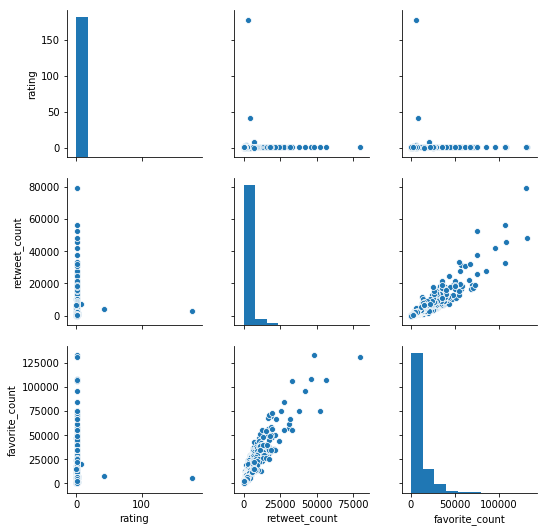

In [98]:
sns.pairplot(df_inner[['rating','retweet_count','favorite_count']])

It is obvious that ratings have a few outliers and I will remove these outliers

In [108]:
df_inner.rating.value_counts().sort_index()

0.000000        2
0.100000        4
0.200000       10
0.300000       19
0.400000       15
0.500000       34
0.600000       32
0.636364        1
0.700000       51
0.800000       95
0.818182        1
0.900000      151
1.000000      421
1.100000      402
1.200000      454
1.300000      261
1.400000       35
2.600000        1
2.700000        1
3.428571        1
7.500000        1
42.000000       1
177.600000      1
Name: rating, dtype: int64

In [109]:
# remove ratings>1.5
df_rating = df_inner[df_inner.rating < 1.5]

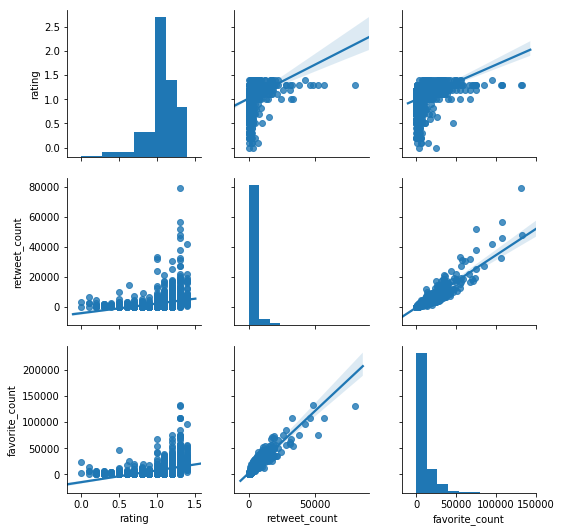

In [113]:
sns.pairplot(df_rating[['rating','retweet_count','favorite_count']], kind='reg')

In [115]:
corr = df_rating[['rating','retweet_count','favorite_count']].corr()
corr.style.background_gradient()

,rating,retweet_count,favorite_count
rating,1,0.299741,0.402516
retweet_count,0.299741,1,0.912953
favorite_count,0.402516,0.912953,1


There is a strong positive correlation between number of retweets and favorites, and a moderate positive correlation between rating and the other two variables.

Q2: Which breeds of dogs appear the most in the dataset?

In [125]:
# Get the dataset in which only dogs are recognized
df_dog = df_inner[df_inner.p1_dog==True]

In [126]:
df_dog.p1.value_counts()[0:5]

golden_retriever      139
labrador_retriever     95
pembroke               88
chihuahua              79
pug                    54
Name: p1, dtype: int64

Golden retriever, labrador_retriever, pembroke, chihuahua and pug are the most popular breeds.

Q3: Which breeds of dogs are the most favored (get the highest ratings, retweets or favorites)?

In [132]:
# In order to have statistical significance, we consider breeds that appear at least 10 times.
counts =  df_dog.p1.value_counts()
l_10 = list(counts[counts>=10].index)
l_10

['golden_retriever',
 'labrador_retriever',
 'pembroke',
 'chihuahua',
 'pug',
 'chow',
 'samoyed',
 'pomeranian',
 'toy_poodle',
 'malamute',
 'cocker_spaniel',
 'french_bulldog',
 'chesapeake_bay_retriever',
 'miniature_pinscher',
 'german_shepherd',
 'siberian_husky',
 'staffordshire_bullterrier',
 'eskimo_dog',
 'shetland_sheepdog',
 'maltese_dog',
 'cardigan',
 'beagle',
 'shih_tzu',
 'rottweiler',
 'lakeland_terrier',
 'italian_greyhound',
 'kuvasz',
 'west_highland_white_terrier',
 'great_pyrenees',
 'american_staffordshire_terrier',
 'vizsla',
 'basset',
 'pekinese',
 'border_collie',
 'airedale',
 'old_english_sheepdog',
 'dalmatian',
 'kelpie',
 'soft_coated_wheaten_terrier',
 'collie',
 'blenheim_spaniel',
 'bernese_mountain_dog',
 'boxer']

In [140]:
df_dog_10 = df_dog[df_dog.p1.isin(l_10)]

In [178]:
def ave(col):
    average = df_dog_10.groupby('p1')[col].mean().sort_values(ascending=False)
    average.plot.barh(figsize = (10,10))
    print(average[0:3].index)

Index(['pomeranian', 'kuvasz', 'eskimo_dog'], dtype='object', name='p1')


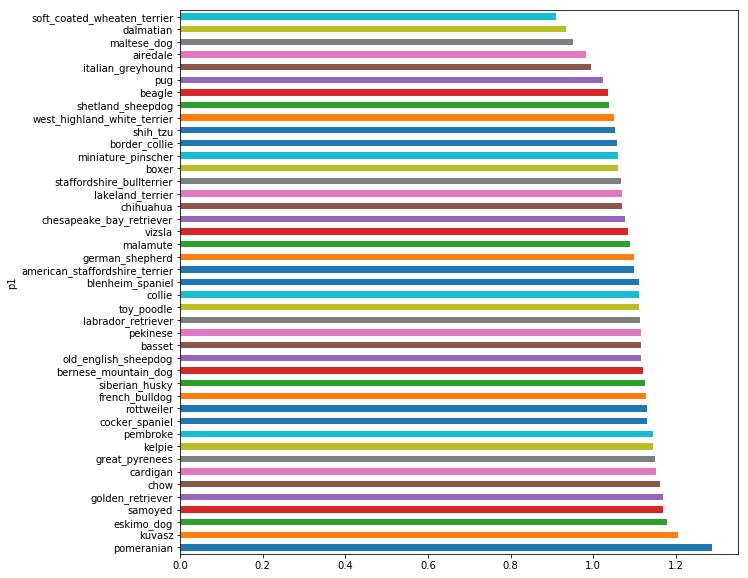

In [179]:
ave('rating')

Index(['eskimo_dog', 'great_pyrenees', 'french_bulldog'], dtype='object', name='p1')


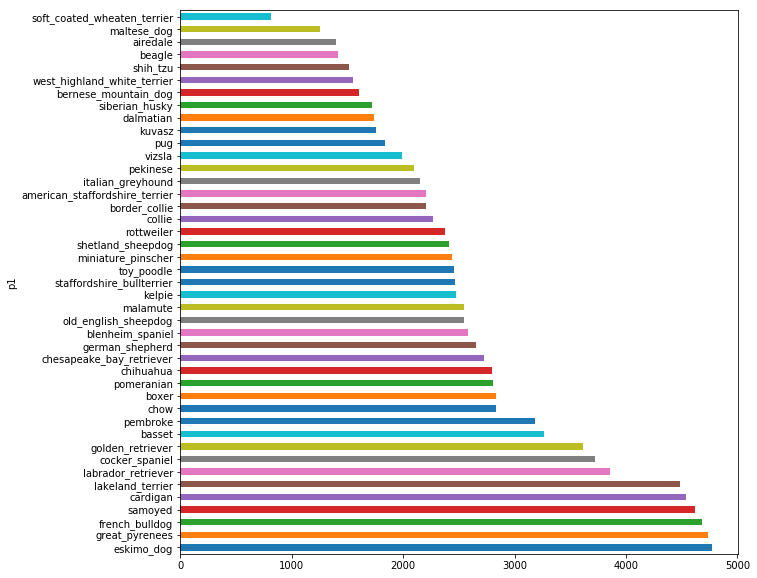

In [180]:
ave('retweet_count')

Index(['french_bulldog', 'cardigan', 'basset'], dtype='object', name='p1')


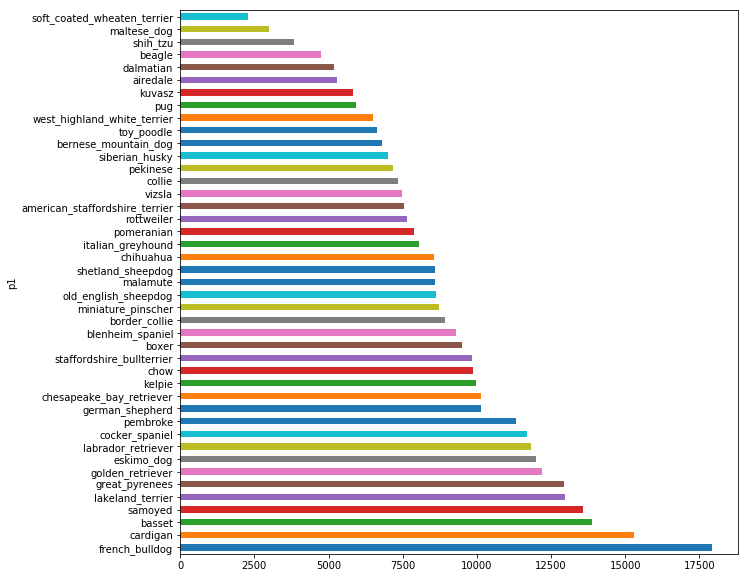

In [181]:
ave('favorite_count')

The most liked breeds, using different metrics, are:

- rating: pomeranian, kuvasz, eskimo dog
- number of retweets: eskimo dog, great_pyrenees, french_bulldog
- number of favorites: french_bulldog, cardigan, basset

French bulldogs are the most liked breed if we consider all the three metrics